In [9]:
import tensorflow as tf

tf_string = tf.constant('hello tensorflow')
tf_int = tf.constant(10)
tf_float = tf.constant(3.14)

print(tf_string)
print(tf_int)
print(tf_float)


Tensor("Const_10:0", shape=(), dtype=string)
Tensor("Const_11:0", shape=(), dtype=int32)
Tensor("Const_12:0", shape=(), dtype=float32)


In [2]:
tf_string.name

'Const:0'

In [3]:
tf_string.shape

TensorShape([])

In [4]:
tf_string.dtype

tf.string

In [6]:
one = tf.constant([[1, 1, 1]])
two = tf.constant([[2], [2], [2]])

matmul = tf.matmul(one, two)
print(matmul)

Tensor("MatMul:0", shape=(1, 1), dtype=int32)


In [7]:
one = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
two = tf.constant([[2], [2], [2]])

matmul = tf.matmul(one, two)
print(matmul)

Tensor("MatMul_1:0", shape=(3, 1), dtype=int32)


## Session

In [10]:
import tensorflow as tf

tf_string = tf.constant('hello tensorflow')
tf_int = tf.constant(10)
tf_float = tf.constant(3.14)

with tf.Session() as sess:
    _tf_string = sess.run(tf_string)
    _tf_int = sess.run(tf_int)
    _tf_float = sess.run(tf_float)
    
    print(_tf_string)
    print(_tf_int)
    print(_tf_float)

b'hello tensorflow'
10
3.14


In [15]:
one = tf.constant([[1, 1, 1]])
two = tf.constant([[2], [2], [2]])

matmul = tf.matmul(one, two)

with tf.Session() as sess:
    _matmul = sess.run(matmul)
    print(_matmul)

[[6]]


In [16]:
one = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
two = tf.constant([[2], [2], [2]])

matmul = tf.matmul(one, two)
with tf.Session() as sess:
    _matmul = sess.run(matmul)
    print(_matmul)

[[12]
 [30]
 [48]]


In [19]:
one = tf.constant([[1, 1, 1]])
two = tf.constant([[2], [2], [2]])

matmul = tf.matmul(one, two)

with tf.Session() as sess:
    _one, _two, _matmul = sess.run([one, two, matmul])
    print(_one)
    print(_two)
    print(_matmul)
    

[[1 1 1]]
[[2]
 [2]
 [2]]
[[6]]


## constant

In [20]:
const = tf.constant(10)

with tf.Session() as sess:
    print(sess.run(const))

10


## placeholder

In [21]:
data = [1, 2, 3, 4, 5]
p1_data = tf.placeholder(tf.float32)

with tf.Session() as sess:
    print(sess.run(p1_data, {p1_data: data}))

[ 1.  2.  3.  4.  5.]


## variable

In [23]:
var = tf.Variable(10)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(var))

10


# Linear Regression

In [24]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [93]:
samples = 1000
#사칙연산하기 위해 np.array 씌우기
data = np.array([1e-2 * float(i) for i in range(samples)])
label = 3.3*data + 2.7 + np.random.randn(samples)
target = 3.3*data + 2.7
print(label[:10])

[ 4.55629491  2.03062224  4.52790163  5.05746692  2.91991162  3.57150729
  3.09071638  4.34334741  2.45633823  3.07356605]


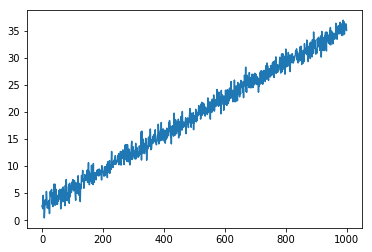

In [41]:
plt.plot(label)

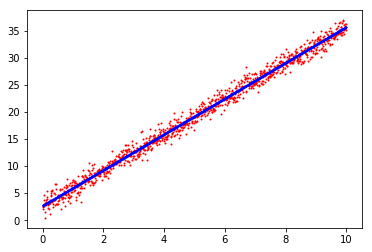

In [43]:
plt.scatter(data, label, 1, 'r')
plt.scatter(data, target, 1, 'b')

In [44]:
x = tf.placeholder(tf.float32)
y_ = tf.placeholder(tf.float32)

In [45]:
w = tf.Variable(8.8)
b = tf.Variable(-4.0)

In [46]:
y = w*x + b

In [76]:
loss = tf.losses.mean_squared_error(y_, y)
train_op = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)

In [77]:
init = tf.global_variables_initializer()

0 686.066
100 6.13072
200 2.95408
300 1.76386
400 1.31791
500 1.15082
600 1.08822
700 1.06476
800 1.05598
900 1.05268
1000 1.05145


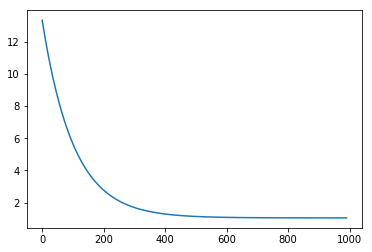

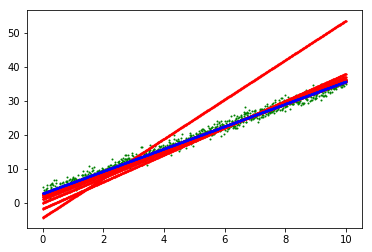

In [81]:
with tf.Session() as sess:
    sess.run(init)
    loss_curve = [] 
    plt.scatter(data, label, 1, 'g')
    for i in range(1001):
        _, _loss = sess.run([train_op, loss], {x: data, y_: label})
        loss_curve.append(_loss)
        if i % 100 == 0:
            _pred = sess.run(y, {x: data})
            plt.scatter(data, _pred, 1, 'r')
            print(i, _loss)
    
    plt.figure(0)
    plt.plot(loss_curve[10:])
    plt.figure(1)
    plt.scatter(data, target, 1, 'b')

step: 0, loss: 686.0661010742188, w: 5.80492639541626, b: -4.415964126586914
step: 100, loss: 6.130721092224121, w: 3.973618745803833, b: -1.7877154350280762
step: 200, loss: 2.95408034324646, w: 3.710777997970581, b: -0.04920220747590065
step: 300, loss: 1.7638617753982544, w: 3.5498905181884766, b: 1.0149589776992798
step: 400, loss: 1.317911982536316, w: 3.4514095783233643, b: 1.6663434505462646
step: 500, loss: 1.1508244276046753, w: 3.3911285400390625, b: 2.0650618076324463
step: 600, loss: 1.0882203578948975, w: 3.3542299270629883, b: 2.3091204166412354
step: 700, loss: 1.0647635459899902, w: 3.33164381980896, b: 2.458512544631958
step: 800, loss: 1.055975079536438, w: 3.3178188800811768, b: 2.5499556064605713
step: 900, loss: 1.0526821613311768, w: 3.309356212615967, b: 2.605929374694824
step: 1000, loss: 1.0514485836029053, w: 3.3041763305664062, b: 2.6401913166046143


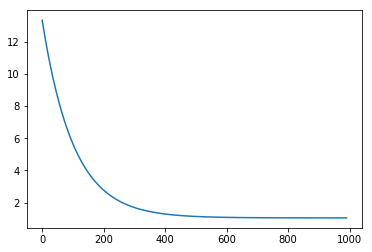

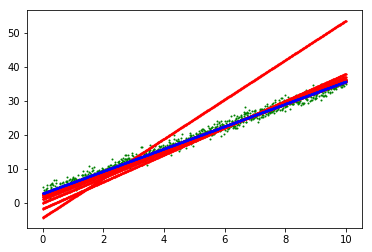

In [83]:
with tf.Session() as sess:
    sess.run(init)
    loss_curve = [] 
    plt.scatter(data, label, 1, 'g')
    for i in range(1001):
        _, _loss, _w, _b = sess.run([train_op, loss, w, b], {x: data, y_: label})
        loss_curve.append(_loss)
        if i % 100 == 0:
            _pred = sess.run(y, {x: data})
            plt.scatter(data, _pred, 1, 'r')
            print('step: {}, loss: {}, w: {}, b: {}'.format(\
                                            i, _loss, _w, _b))
    
    plt.figure(0)
    plt.plot(loss_curve[10:])
    plt.figure(1)
    plt.scatter(data, target, 1, 'b')

# Logistic Regression

In [89]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

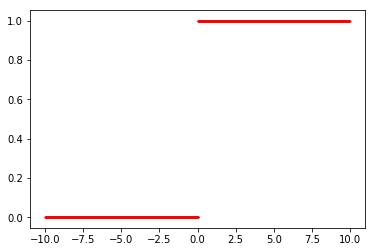

In [96]:
samples = 1000

data = [1e-2*float(i) for i in range(-samples, samples)]
label = [1 if i > 3.14 else 0 for i in range(-samples, samples)]
plt.scatter(data, label, 1, 'r')

In [97]:
x = tf.placeholder(tf.float32)
y_ = tf.placeholder(tf.float32)

w = tf.Variable(0.0, dtype=tf.float32)
b = tf.Variable(0.0, dtype=tf.float32)

y = w*x + b

In [98]:
loss = tf.losses.sigmoid_cross_entropy(y_, y)
train_op = tf.train.GradientDescentOptimizer(1e-2).minimize(loss)

In [105]:
init = tf.global_variables_initializer()

## ML_lab_05

In [99]:
predicted = tf.cast(y > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y_), dtype=tf.float32))

In [107]:
with tf.Session() as sess:
    sess.run(init)
    
    for step in range(1001):
        _loss, _ = sess.run([loss, train_op], feed_dict={x: data, y_: label})
        if step % 100 == 0:
            print(step, _loss)
            
    h, c, a = sess.run([y, predicted, accuracy], feed_dict={x: data, y_: label})
    print("\nHypothesis: \n", h, "\nCorrect (Y): \n", c, "\nAccuracy: \n", a)
    

0 0.693146
100 0.139421
200 0.107458
300 0.0928943
400 0.0839527
500 0.0776865
600 0.072951
700 0.0691929
800 0.0661063
900 0.063506
1000 0.0612719

Hypothesis: 
 [-13.44625568 -13.43282318 -13.41939068 ...,  13.37765503  13.39108562
  13.40451813] 
Correct (Y): 
 [ 0.  0.  0. ...,  1.  1.  1.] 
Accuracy: 
 0.9825


## class01

step: 0, loss: 0.6931459307670593
step: 200, loss: 0.10745800286531448
step: 400, loss: 0.0839526578783989
step: 600, loss: 0.07295096665620804
step: 800, loss: 0.06610629707574844
step: 1000, loss: 0.061271924525499344
step: 1200, loss: 0.05759963393211365
step: 1400, loss: 0.05467473343014717
step: 1600, loss: 0.05226598680019379
step: 1800, loss: 0.05023253709077835
step: 2000, loss: 0.04848265275359154
step: 2200, loss: 0.04695364832878113
step: 2400, loss: 0.04560094699263573
step: 2600, loss: 0.04439175873994827
step: 2800, loss: 0.04330141097307205
step: 3000, loss: 0.04231085628271103
step: 3200, loss: 0.041405148804187775
step: 3400, loss: 0.04057229682803154
step: 3600, loss: 0.03980265185236931
step: 3800, loss: 0.03908826783299446
step: 4000, loss: 0.03842253237962723
step: 4200, loss: 0.03779996186494827
step: 4400, loss: 0.03721586614847183
step: 4600, loss: 0.03666627034544945
step: 4800, loss: 0.03614775836467743
step: 5000, loss: 0.035657383501529694
step: 5200, loss: 

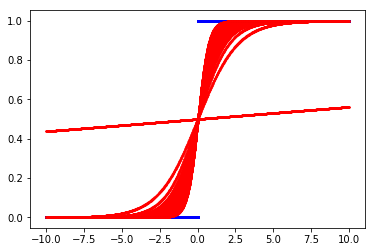

In [110]:
with tf.Session() as sess:
    sess.run(init)
    for step in range(10001):
        _loss, _ = sess.run([loss, train_op], feed_dict={x: data, y_: label})
        if step % 200 == 0:
            _pred = sess.run(tf.nn.sigmoid(y), {x: data})
            plt.scatter(data, label, 1, 'b')
            plt.scatter(data, _pred, 1, 'r')
            print('step: {}, loss: {}'.format(step, _loss))